-3.1354942159291492 0.32643490981377116 4.605170185988091


Text(0, 0.5, 'Logrithm value or its approximation')

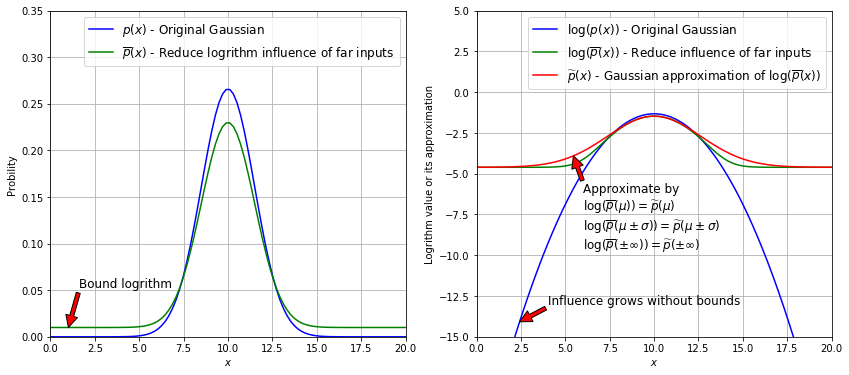

In [111]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
from math import log, exp
%matplotlib inline

def linep(x, mean, std, c1, c2):
    return [c1 * exp(-0.5 * ((i - mean) / std) ** 2) + c2 for i in x]

def tildep(x, mean, std, c1, c2):
    d3 = -log(c2)
    d1 = -log(c1 + c2) - d3
    d2 = -2 * log((-log(c1 * exp(-0.5) + c2) - d3) / d1)
    print(d1, d2, d3)
    return [-d1 * exp(-0.5 * d2 * ((i - mean) / std) ** 2) - d3 for i in x]

fig = plt.figure(figsize=(14, 6))
x_min, x_max = 0, 20
ax = fig.add_subplot(121)
mean, std = 10.0, 1.5
c1, c2 = 0.22, 0.01
x = np.linspace(x_min, x_max, 100)
y = scipy.stats.norm.pdf(x, mean, std)
y2 = linep(x, mean, std, c1, c2)
ax.plot(x, y, 'b', label='$p(x)$ - Original Gaussian')
ax.plot(x, y2, 'g', label='$\overline{p}(x)$ - Reduce logrithm influence of far inputs')
ax.annotate('Bound logrithm', xy=(x[5], y2[5]), size=12,
            xytext=(0.08, 0.15), textcoords='axes fraction', arrowprops=dict(facecolor='red'))
ax.grid()
ax.legend(fontsize=12)
ax.set_xlim(x_min, x_max)
ax.set_ylim(0, 0.35)
ax.set_xlabel('$x$')
ax.set_ylabel('Probility')

ax = fig.add_subplot(122)
ax.plot(x, [log(i) for i in y], 'b', label='$\log(p(x))$ - Original Gaussian')
ax.plot(x, [log(i) for i in y2], 'g', label='$\log(\overline{p}(x))$ - Reduce influence of far inputs')
ax.annotate('Influence grows without bounds', xy=(x[12], log(y[12])), size=12,
            xytext=(0.2, 0.1), textcoords='axes fraction', arrowprops=dict(facecolor='red'))
y3 = tildep(x, mean, std, c1, c2)
ax.plot(x, y3, 'r', label='$\widetilde{p}(x)$ - Gaussian approximation of $\log(\overline{p}(x))$')
ax.annotate('Approximate by\n'
            '$\log(\overline{p}(\mu))=\widetilde{p}(\mu)$\n'
            '$\log(\overline{p}(\mu\pm\sigma))=\widetilde{p}(\mu\pm\sigma)$\n'
            '$\log(\overline{p}(\pm\infty))=\widetilde{p}(\pm\infty)$', xy=(x[27], y3[27]), size=12,
            xytext=(0.3, 0.27), textcoords='axes fraction', arrowprops=dict(facecolor='red'))
ax.grid()
ax.legend(fontsize=12)
ax.set_xlim(x_min, x_max)
ax.set_ylim(-15, 5)
ax.set_xlabel('$x$')
ax.set_ylabel('Logrithm value or its approximation')

Text(0, 0.5, '$\\widetilde{p}(x)$ - Gaussian Approximation')

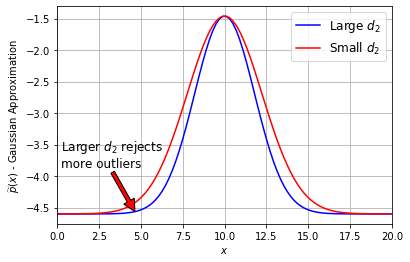

In [96]:
def ddd(x, d1, d2, d3):
    return [-d1 * exp(-0.5 * d2 * ((i - mean) / std) ** 2) - d3 for i in x]
fig, ax = plt.subplots()
y4 = ddd(x, -3.14, 0.70, 4.6)
y5 = ddd(x, -3.14, 0.45, 4.6)
ax.annotate('Larger $d_2$ rejects\nmore outliers', xy=(x[23], y4[23]), size=12,
            xytext=(0.01, 0.26), textcoords='axes fraction', arrowprops=dict(facecolor='red'))
ax.plot(x, y4, 'b', label='Large $d_2$')
ax.plot(x, y5, 'r', label='Small $d_2$')
ax.grid()
ax.legend(fontsize=12)
ax.set_xlim(x_min, x_max)
# ax.set_ylim(-15, 5)
ax.set_xlabel('$x$')
ax.set_ylabel('$\widetilde{p}(x)$ - Gaussian Approximation')

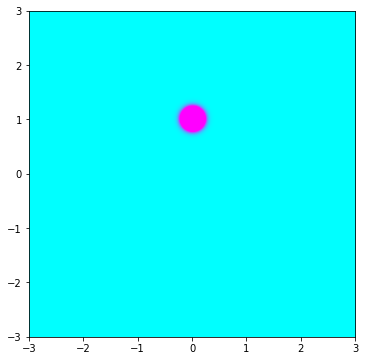

In [70]:
# x = np.linspace(-3.0, 3.0, 100)
# y = np.linspace(-3.0, 3.0, 100)
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))
mu = np.array([0, 1])
cov = np.array([[0.01, 0], [0, 0.01]])
rv = scipy.stats.multivariate_normal(mu, cov)
fig, ax = plt.subplots(figsize=(14, 6))
vmax, vmin = rv.pdf(pos).max(), rv.pdf(pos).min()
im = ax.imshow(np.rot90(rv.pdf(pos)), interpolation='bilinear', cmap=plt.cm.cool,
               extent=[-3, 3, -3, 3], vmax=1, vmin=0)

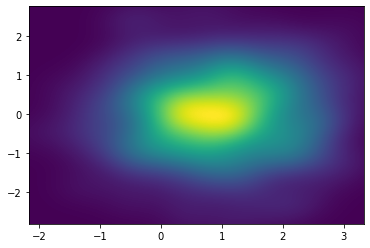

In [74]:
x = 1 + np.random.normal(size=500)
y = np.random.normal(size=500)
nbins=1000
k = scipy.stats.kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')

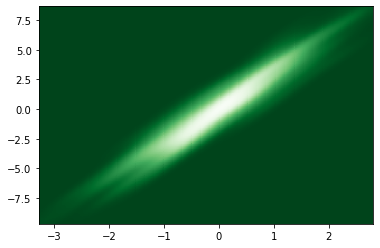

In [66]:
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.Greens_r)

In [67]:
k

Text(0, 0.5, 'Probility')

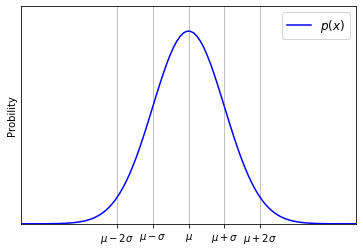

In [135]:
fig, ax = plt.subplots()
x = np.linspace(0, 14, 100)
y = scipy.stats.norm.pdf(x, 7, 1.5)
ax.plot(x, y, 'b', label='$p(x)$')
ax.grid()
ax.legend(fontsize=12)
ax.set_xlim(0, 14)
ax.set_ylim(0, 0.3)
ax.set_xticks([4, 5.5, 7, 8.5, 10])
ax.set_xticklabels(['$\mu-2\sigma$', '$\mu-\sigma$', '$\mu$', '$\mu+\sigma$', '$\mu+2\sigma$'])
ax.set_yticks([])
ax.set_ylabel('Probility')